In [747]:
import numpy as np
import pandas as pd
import seaborn as sb


In [748]:
df = pd.read_csv('carprice.csv')

In [749]:
df.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1701,Maruti Swift Dzire VDI,2018,680000,20000,Diesel,Individual,Manual,First Owner
700,Renault Duster 85PS Diesel RxL,2015,650000,100000,Diesel,Individual,Manual,First Owner
727,Volkswagen Polo Petrol Highline 1.2L,2010,211000,45143,Petrol,Dealer,Manual,Second Owner
2745,Hyundai Grand i10 Magna AT,2017,520000,10510,Petrol,Dealer,Automatic,First Owner
1004,Hyundai i20 Magna 1.2,2016,600000,25000,Petrol,Individual,Manual,First Owner
3365,Maruti Baleno Alpha 1.2,2018,690000,11174,Petrol,Dealer,Manual,First Owner
3107,Ford Fiesta 1.4 ZXi TDCi ABS,2009,110000,100000,Diesel,Individual,Manual,Fourth & Above Owner
2393,Maruti Omni E MPI STD BS IV,2016,240000,5800,Petrol,Individual,Manual,Second Owner
2087,Hyundai Grand i10 Sportz,2014,400000,48000,Petrol,Individual,Manual,First Owner
123,Maruti Zen LX,2004,95000,50000,Petrol,Individual,Manual,First Owner


### Feature Engineering 

In [750]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [751]:
df.drop_duplicates().reset_index(drop=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
3572,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
3573,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
3574,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
3575,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [752]:
df['car_age'] = 2025 - df['year']
df = df.drop('year',axis=1)

In [753]:
df['brand'] = df['name'].str.split().str[0].str.upper()

In [754]:
# remove duplicate names
df= df.drop('name',axis = 1)

In [755]:
ordinal_mapping ={
    'Test Drive Car':0,
    'First Owner': 1,
    'Second Owner' : 2,
    'Third Owner' : 3,
    'Fourth & Above Owner' : 4,
}

In [756]:
df['owner'] = df['owner'].map(ordinal_mapping)

In [757]:
df['log_price'] = np.log1p(df['selling_price'])

### Detecting Outliers

In [758]:
df['selling_price'].describe()

count    4.340000e+03
mean     5.041273e+05
std      5.785487e+05
min      2.000000e+04
25%      2.087498e+05
50%      3.500000e+05
75%      6.000000e+05
max      8.900000e+06
Name: selling_price, dtype: float64

<Axes: ylabel='selling_price'>

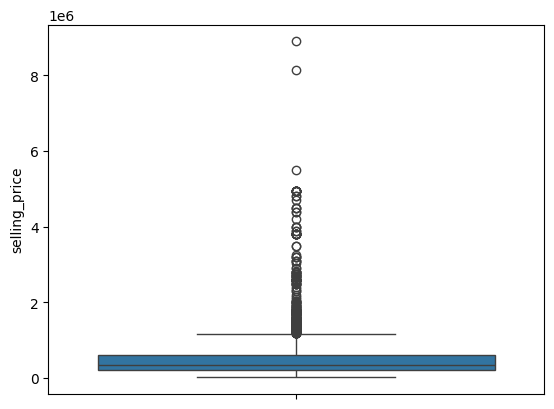

In [759]:
sb.boxplot(df['selling_price'])

In [760]:
 #data become right skewed but want normally distributed
df['selling_price'] = np.log1p(df['selling_price'])

C:\Users\Gagan\AppData\Local\Temp\ipykernel_1108\4125214786.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['selling_price'])


<Axes: xlabel='selling_price', ylabel='Density'>

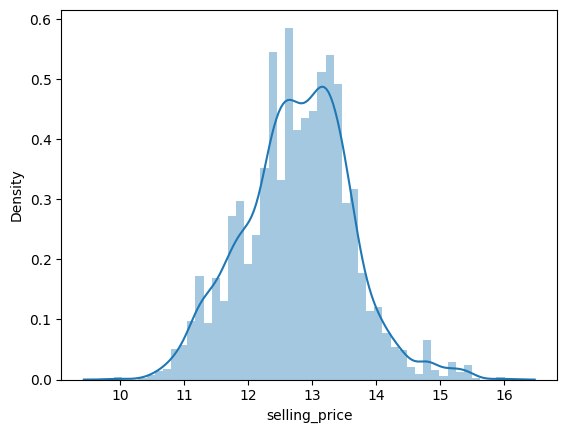

In [761]:
sb.distplot(df['selling_price'])

<Axes: ylabel='selling_price'>

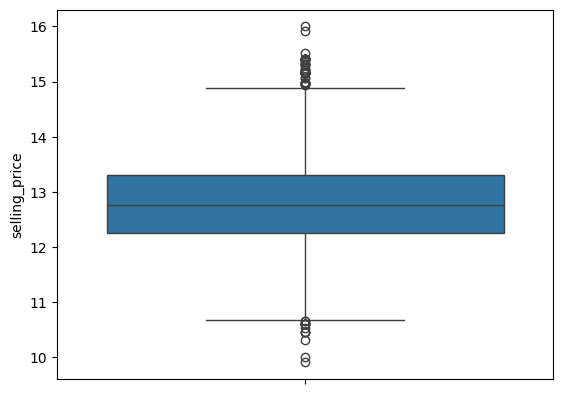

In [762]:
sb.boxplot(df['selling_price'])

**Trimming**

In [763]:
upperlt = df['selling_price'].quantile(0.99)
lowelt = df['selling_price'].quantile(0.01)

In [764]:
upperlt ,lowelt

(np.float64(14.978661680269907), np.float64(10.915106645867503))

In [765]:
newdf = df[(df['selling_price'] <= upperlt )& (df['selling_price'] >= lowelt)] 

In [766]:
newdf.shape

(4255, 9)

<Axes: ylabel='selling_price'>

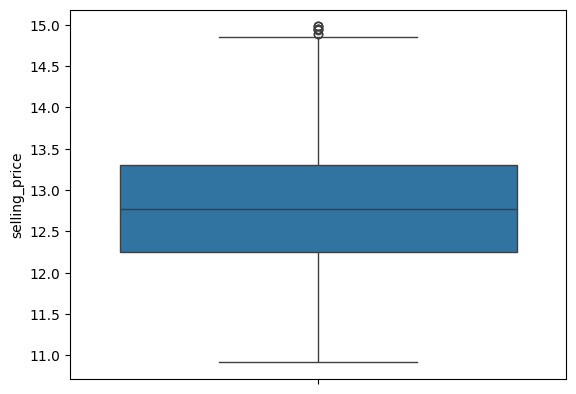

In [767]:
sb.boxplot(newdf['selling_price'])

In [768]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,brand,log_price
0,11.002117,70000,Petrol,Individual,Manual,1,18,MARUTI,11.002117
1,11.813037,50000,Petrol,Individual,Manual,1,18,MARUTI,11.813037
2,13.304687,100000,Diesel,Individual,Manual,1,13,HYUNDAI,13.304687
3,12.429220,46000,Petrol,Individual,Manual,1,8,DATSUN,12.429220
4,13.017005,141000,Diesel,Individual,Manual,2,11,HONDA,13.017005


In [769]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [770]:
# Numeric and categorical feature splitting 
numeric_col = ['car_age','km_driven']
categorical_col = ['fuel','seller_type','transmission','owner','brand']

In [771]:
x = df.drop(columns=['selling_price','log_price'],axis=1)
y = df['log_price']


x.shape,y.shape

((4340, 7), (4340,))

In [772]:
x.head()

,km_driven,fuel,seller_type,transmission,owner,car_age,brand
0,70000,Petrol,Individual,Manual,1,18,MARUTI
1,50000,Petrol,Individual,Manual,1,18,MARUTI
2,100000,Diesel,Individual,Manual,1,13,HYUNDAI
3,46000,Petrol,Individual,Manual,1,8,DATSUN
4,141000,Diesel,Individual,Manual,2,11,HONDA


In [773]:
#Train -test split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)

In [774]:
x_train.shape,y_train.shape

((868, 7), (868,))

In [775]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),categorical_col),
        ('num',StandardScaler(),numeric_col),
    ],remainder='passthrough'
)

In [776]:
pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('lr',LinearRegression())
])

In [777]:
pipeline.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [778]:
y_pred = pipeline.predict(x_test)
y_predprice = np.expm1(y_pred)
y_testprice = np.expm1(y_test)

c:\Users\Gagan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [779]:
mae = mean_absolute_error(y_testprice,y_predprice)
rootsq = np.sqrt(mean_squared_error(y_testprice,y_predprice))
rscore = r2_score(y_testprice,y_predprice)

In [780]:
print(mae)
print(rootsq)
print("r2 score :",rscore)

151421.38275570548
301627.55631522444
r2 score : 0.7202106622934029
